In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# use textwrap from python standard lib to help manage how the description 
# text shows up 
import textwrap

In [9]:
df = pd.read_csv("compiled_results_filtered.csv")
df = df.sort_values(by=['prauc_avg'], ascending=True).reset_index(drop=True)
df.head()

,classifier,sampler_seed,date_time,dataset,dataprep_method,feat_file_name,label_file_name,id,meta_label_cols,feat_select_method,...,XGB_lambda,XGB_max_depth,XGB_objective,XGB_scale_pos_weight,XGB_seed,LogisticRegression_class_weight,LogisticRegression_l1_ratio,LogisticRegression_max_iter,LogisticRegression_penalty,LogisticRegression_solver
0,sgd,20014100,2022-07-29-1130-59,cnc,cnc_index_select_transposed,cnc_features_54_comp.csv,high_level_labels_MASTER_update2020-08-06_new-...,20014100_sgd_2022-07-29-1130-59_cnc,"['unix_date', 'tool_no', 'case_tool_54']",tsfresh_random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lr,30774062,2022-07-29-1538-46,cnc,cnc_index_select_transposed,cnc_features_54_comp.csv,high_level_labels_MASTER_update2020-08-06_new-...,30774062_lr_2022-07-29-1538-46_cnc,"['unix_date', 'tool_no', 'case_tool_54']",tsfresh_random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,none,lbfgs
2,ridge,11876011,2022-07-29-0755-00,cnc,cnc_index_select_transposed,cnc_features_54_comp.csv,high_level_labels_MASTER_update2020-08-06_new-...,11876011_ridge_2022-07-29-0755-00_cnc,"['unix_date', 'tool_no', 'case_tool_54']",tsfresh_random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nb,32724419,2022-07-29-0942-03,cnc,cnc_index_select_transposed,cnc_features_54_comp.csv,high_level_labels_MASTER_update2020-08-06_new-...,32724419_nb_2022-07-29-0942-03_cnc,"['unix_date', 'tool_no', 'case_tool_54']",tsfresh_random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,svm,8273625,2022-07-29-1901-10,cnc,cnc_index_select_transposed,cnc_features_54_comp.csv,high_level_labels_MASTER_update2020-08-06_new-...,8273625_svm_2022-07-29-1901-10_cnc,"['unix_date', 'tool_no', 'case_tool_54']",random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_119415/147542821.py:171: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


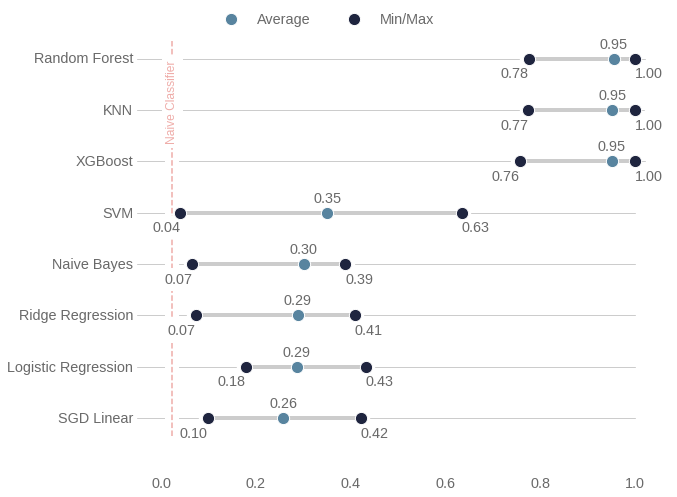

In [36]:
plt.style.use("seaborn-whitegrid")  # set style because it looks nice
fig, ax = plt.subplots(1, 1, figsize=(10, 8),)

# color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"
redish = "#d73027"

DOT_SIZE = 150

# create the various dots
# avg dot
ax.scatter(
    x=df["prauc_avg"],
    y=df["classifier"],
    s=DOT_SIZE,
    alpha=1,
    label="Average",
    color=lightblue,
    edgecolors="white",
)

# min dot
ax.scatter(
    x=df["prauc_min"],
    y=df["classifier"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    label="Min/Max",
    edgecolors="white",
    zorder=10,
)

# max dot
ax.scatter(
    x=df["prauc_max"],
    y=df["classifier"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    edgecolors="white",
)

# create the horizontal line
# between min and max vals
ax.hlines(
    y=df["classifier"],
    xmin=df["prauc_min"],
    xmax=df["prauc_max"],
    color="grey",
    alpha=0.4,
    lw=4, # line-width
    zorder=0, # make sure line at back
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# plot the line that shows how a naive classifier performs
# plot two lines, one white, so that there is a gap between grid lines
# from https://stackoverflow.com/a/12731750/9214620
ax.plot([0.024, 0.024], [y_min, y_max], linestyle="-", color="white", linewidth=14)
ax.plot([0.024, 0.024], [y_min, y_max], linestyle="--", color=redish, alpha=0.4)


# dictionary used to map the column labels from df to a readable name
label_dict = {
    "sgd": "SGD Linear",
    "xgb": "XGBoost",
    "rf": "Random Forest",
    "knn": "KNN",
    "nb": "Naive Bayes",
    "ridge": "Ridge Regression",
    "svm": "SVM",
    "lr": "Logistic Regression",
}

# iterate through each result and apply the text
# df should already be sorted
for i in range(0, df.shape[0]):
    # avg auc score
    ax.text(
        x=df["prauc_avg"][i],
        y=i + 0.15,
        s="{:.2f}".format(df["prauc_avg"][i]),
        horizontalalignment="center",
        verticalalignment="bottom",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # min auc score
    ax.text(
        x=df["prauc_min"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["prauc_min"][i]),
        horizontalalignment="right",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
        backgroundcolor="white",
        zorder=9,
    )

    # max auc score
    ax.text(
        x=df["prauc_max"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["prauc_max"][i]),
        horizontalalignment="left",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # add thin leading lines towards classifier names
    # to the right of max dot
    ax.plot(
        [df["prauc_max"][i] + 0.02, 1.0],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )
    
    # to the left of min dot
    ax.plot(
        [-0.05, df["prauc_min"][i] - 0.02],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )

    # add classifier name text
    clf_name = label_dict[df["classifier"][i]]
    ax.text(
        x=-0.059,
        y=i,
        s=clf_name,
        horizontalalignment="right",
        verticalalignment="center",
        size="x-large",
        color="dimgrey",
        weight="normal",
    )


# add text for the naive classifier
ax.text(
    x=0.024,
    y=(y_max-2),
    s="Naive Classifier",
    horizontalalignment="center",
    verticalalignment="bottom",
    size="large",
    color=redish,
    rotation="vertical",
    backgroundcolor="white",
    alpha=0.4,
    zorder=8,
)

# remove the y ticks
ax.set_yticks([])

# drop the gridlines (inherited from 'seaborn-whitegrid' style)
# and drop all the spines
ax.grid(False)  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# custom set the xticks since this looks better
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# set properties of xtick labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax.tick_params(axis="x", pad=20, labelsize="x-large", labelcolor="dimgrey")

# Add plot title and then description underneath it
plt_title = "Top Performing Models by PR-AUC Score"

plt_desc = (
    "The top performing models in the feature engineering approach, "
    "as sorted by the precision-recall area-under-curve (PR-AUC) score. "
    "The average PR-AUC score for the k-folds-cross-validiation is shown, "
    "along with the minimum and maximum scores in the cross-validation. The baseline"
    " of a naive/random classifier is demonstated by a dotted line."
)

# set the plot description
# use the textwrap.fill (from textwrap std. lib.) to
# get the text to wrap after a certain number of characters
# PLT_DESC_LOC = 6.8
# ax.text(
#     x=-0.05,
#     y=PLT_DESC_LOC,
#     s=textwrap.fill(plt_desc, 90),
#     horizontalalignment="left",
#     verticalalignment="top",
#     size="large",
#     color="dimgrey",
#     weight="normal",
#     wrap=True,
# )

# ax.text(
#     x=-0.05,
#     y=PLT_DESC_LOC + 0.1,
#     s=plt_title,
#     horizontalalignment="left",
#     verticalalignment="bottom",
#     size=16,
#     color="dimgrey",
#     weight="semibold",
#     wrap=True,
# )

# create legend
# matplotlib > 3.3.0 can use labelcolor in legend
# to change color of text
l = ax.legend(
    frameon=False,
    bbox_to_anchor=(0.6, 1.05),
    ncol=2,
    fontsize="x-large",
    # labelcolor="dimgrey",
)

# google colab doesn't use matplotlib > 3.3.0, so we'll change text color
# the old way, from https://stackoverflow.com/a/18910491/9214620
for text in l.get_texts():
    text.set_color("dimgrey")

# plt.savefig('best_results.svg',dpi=150, bbox_inches = "tight")
plt.show()